In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
appleShare = yf.download("AAPL", start="2020-01-01", end="2025-10-11")
microsoftShare = yf.download("005930.KS", start="2020-01-01", end="2025-10-11")

/tmp/ipython-input-1722555489.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  appleShare = yf.download("AAPL", start="2020-01-01", end="2025-10-11")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1722555489.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  microsoftShare = yf.download("005930.KS", start="2020-01-01", end="2025-10-11")
[*********************100%***********************]  1 of 1 completed


In [ ]:
tabelaCotacoes = pd.DataFrame()
tabelaCotacoes["Apple"] = appleShare["Close"]
tabelaCotacoes["MSFT"] = microsoftShare["Close"]

In [ ]:
tabelaCotacoesNorm = (tabelaCotacoes / tabelaCotacoes.iloc[0])*100

<Axes: xlabel='Date'>

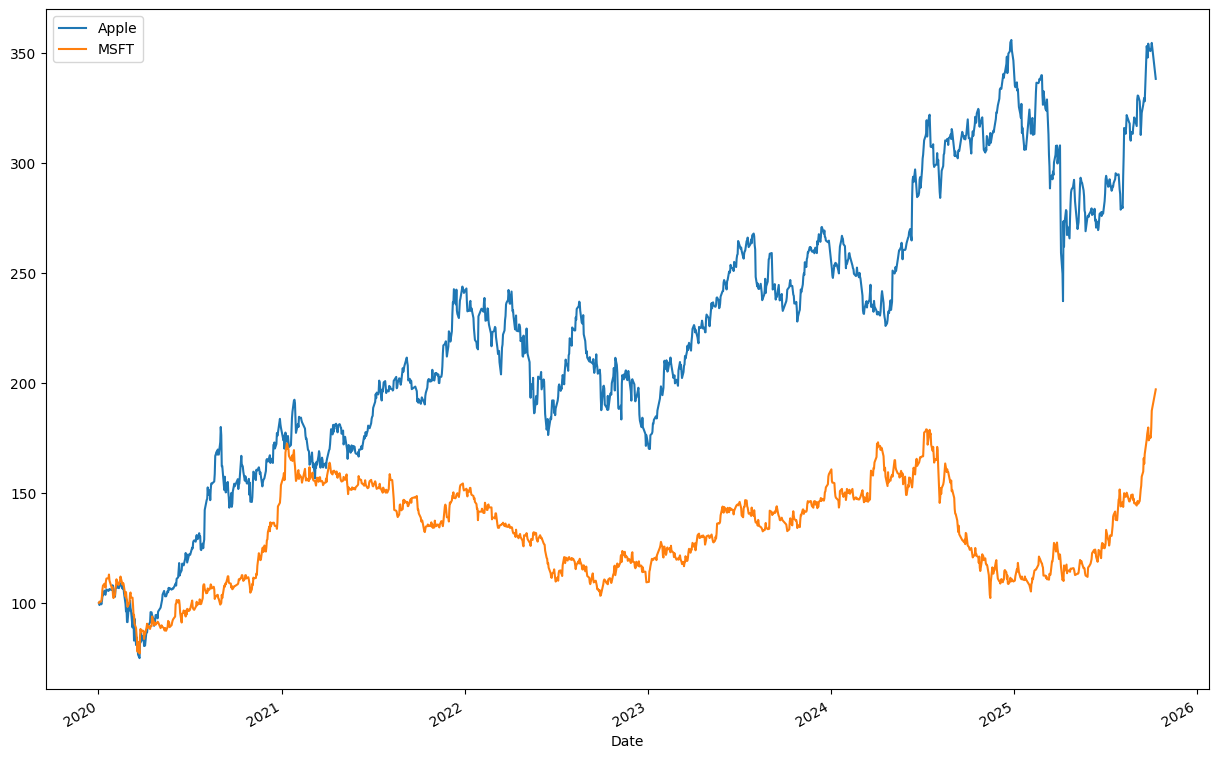

In [ ]:
tabelaCotacoesNorm.dropna(inplace=True)
tabelaCotacoesNorm.plot(figsize=(15,10))

In [ ]:
tabelaCotacoesNorm

,Apple,MSFT
Date,,
2020-01-02,100.000000,100.000000
2020-01-03,99.027795,100.543481
2020-01-06,99.816845,100.543481
2020-01-07,99.347407,101.086979
2020-01-08,100.945532,102.898556
...,...,...
2025-09-29,350.751522,175.729728
2025-09-30,351.027255,175.103613
2025-10-01,352.157677,179.486421


## Análise do Spread Ratio

In [ ]:
tabelaCotacoesNorm['Spread'] = tabelaCotacoesNorm['Apple'] - tabelaCotacoesNorm['MSFT']
tabelaCotacoesNorm['SpreadRatio'] = tabelaCotacoesNorm['Apple'] / tabelaCotacoesNorm['MSFT']
tabelaCotacoesNorm.rename(columns={'SpreadRatio': 'Ratio'}, inplace=True)

<Axes: xlabel='Date'>

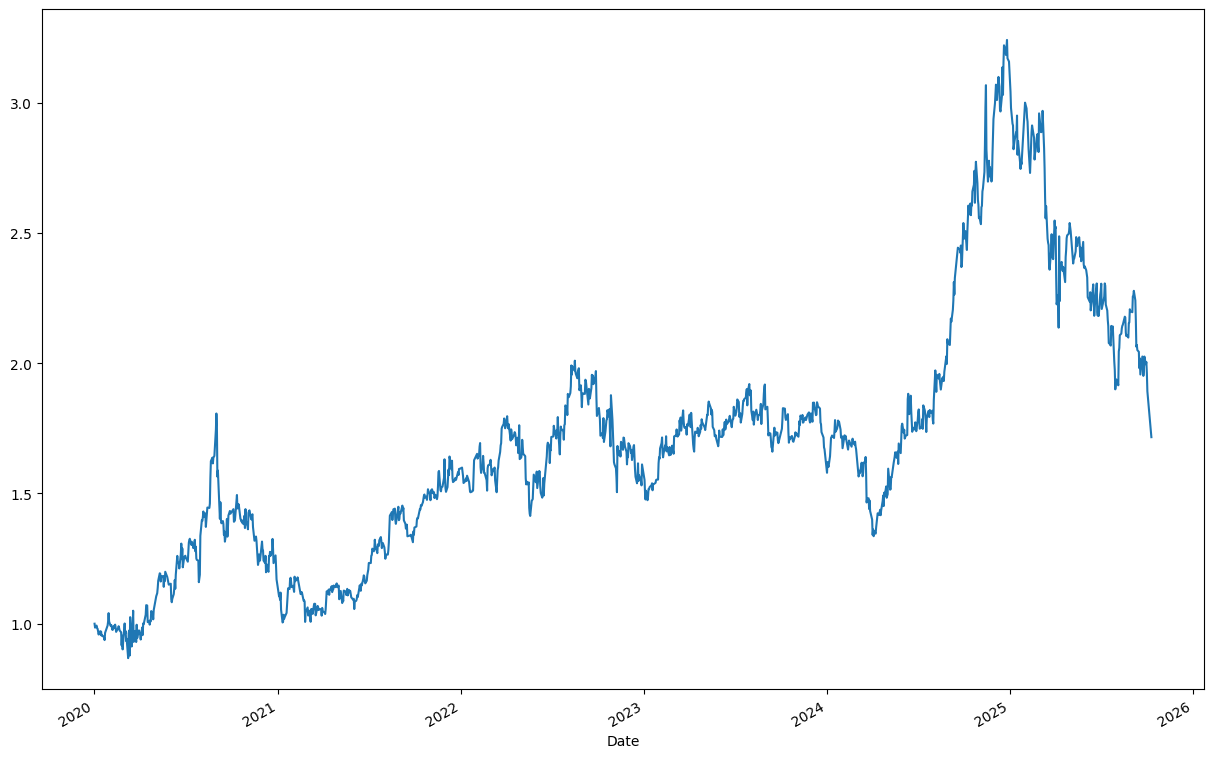

In [ ]:
tabelaCotacoesNorm['Ratio'].plot(figsize=(15,10))

## Correlação

<Axes: xlabel='Date'>

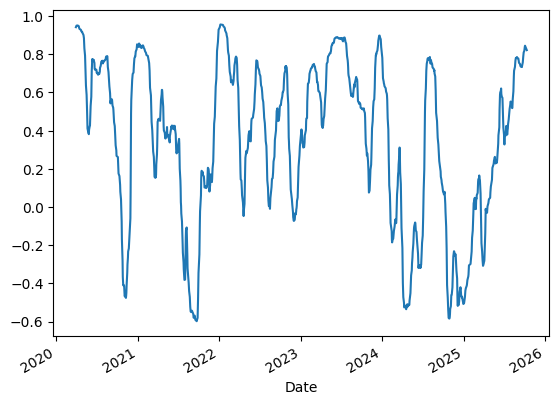

In [ ]:
'''Correlação rolante é mais indicado para séries temporais financeiras pois leva em conta a dinâmica da relação entre os ativos
'''

tabelaCotacoesNorm['Apple'].rolling(window = 60).corr(tabelaCotacoesNorm['MSFT']).plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

testSeries = tabelaCotacoesNorm['Spread'].dropna()
resultADF = adfuller(testSeries)

print('ADF Statistic: %f' % resultADF[0])
print('p-value: %f' % resultADF[1])
print('Critical Values:')
for key, value in resultADF[4].items():
    print('\t%s: %.3f' % (key, value))

## Como o resultado do p-value > 0.05 não podemos afirmar que as ações da Apple e da Microsoft são classificadas como Pair Trading ou estacionárias(i.e quando as duas se distanciam voltam para uma média)


ADF Statistic: -1.613358
p-value: 0.476213
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## Análise financeira das ações -> Parte Fundamentalista

1. Apple

In [ ]:
ticker_symbol = "AAPL"
ticker = yf.Ticker(ticker_symbol)

## Demonstração dos Resultados
# Mostra receitas, custos e lucro ao longo do tempo
income_statement = ticker.financials

## Balanço Patrimonial
#Mostra os ativos, passivos e patrimônio Líquido da empresa

balance_sheet = ticker.balance_sheet

## Fluxo de Caixa
# Mostra como o dinheiro entra e sai da empresa

cash_flow = ticker.cashflow

general_info = ticker.info

print(f'---Demonstração dos Resultados---')
print(income_statement)
#print(f'---Balanço Patrimonial---')
#print(balance_sheet)
#print(f'---Fluxo de Caixa---')
#print(cash_flow)
#print(f'---Informações Gerais---')

---Demonstração dos Resultados---
                                                      2024-09-30  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  2.410000e-01   
Normalized EBITDA                                   1.346610e+11   
Net Income From Continuing Operation Net Minori...  9.373600e+10   
Reconciled Depreciation                             1.144500e+10   
Reconciled Cost Of Revenue                          2.103520e+11   
EBITDA                                              1.346610e+11   
EBIT                                                1.232160e+11   
Net Interest Income                                          NaN   
Interest Expense                                             NaN   
Interest Income                                              NaN   
Normalized Income                                   9.373600e+10   
Net Income From Continuing And Discontinued Ope...  9.373600e+10   
Total Expenses

In [ ]:
import seaborn as sns

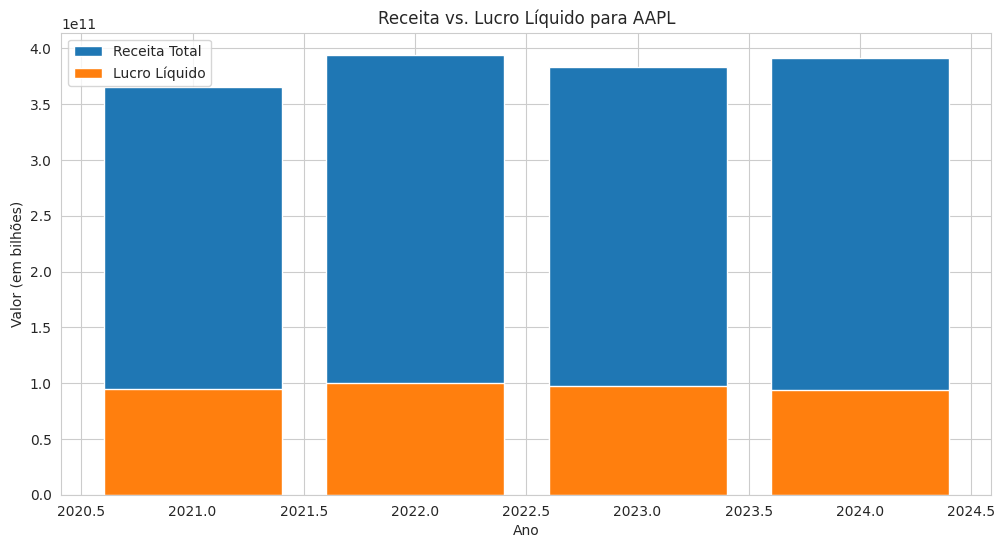

In [ ]:
# Transpondo os dados para facilitar o plot (anos nas colunas -> anos nas linhas)
df = income_statement.T

# Configurando o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico de Receita e Lucro Líquido
plt.bar(df.index.year, df['Total Revenue'], label='Receita Total')
plt.bar(df.index.year, df['Net Income'], label='Lucro Líquido')

plt.title(f'Receita vs. Lucro Líquido para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.legend()
plt.show()

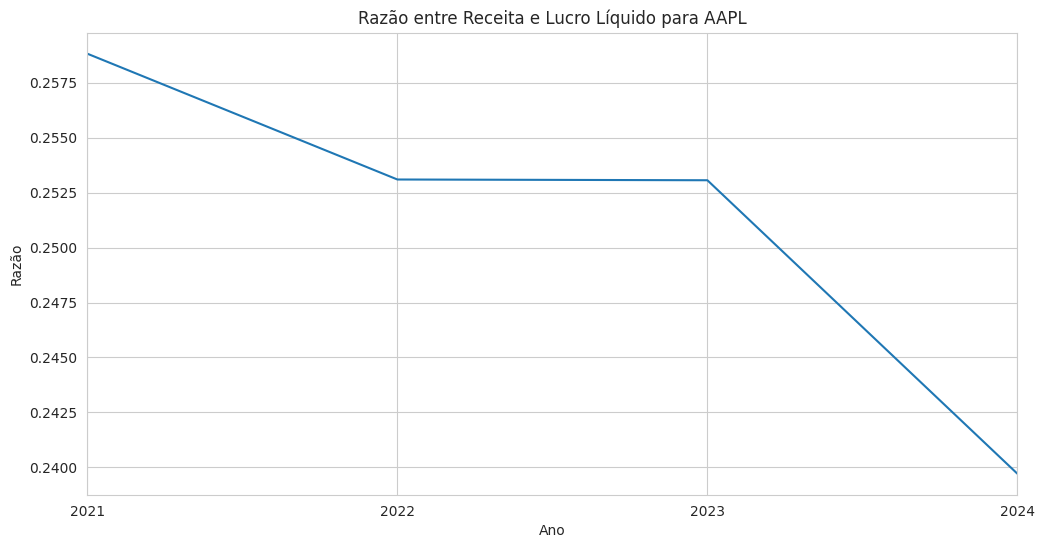

In [ ]:
## Razão entre receita e o lucro líquido
profit_to_revenue_ratio = df['Net Income'] / df['Total Revenue']
profit_to_revenue_ratio.plot(figsize=(12, 6))
plt.title(f'Razão entre Receita e Lucro Líquido para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('Razão')
plt.show()

2. Balanço Patrimonial

In [ ]:
df_bs = balance_sheet.T

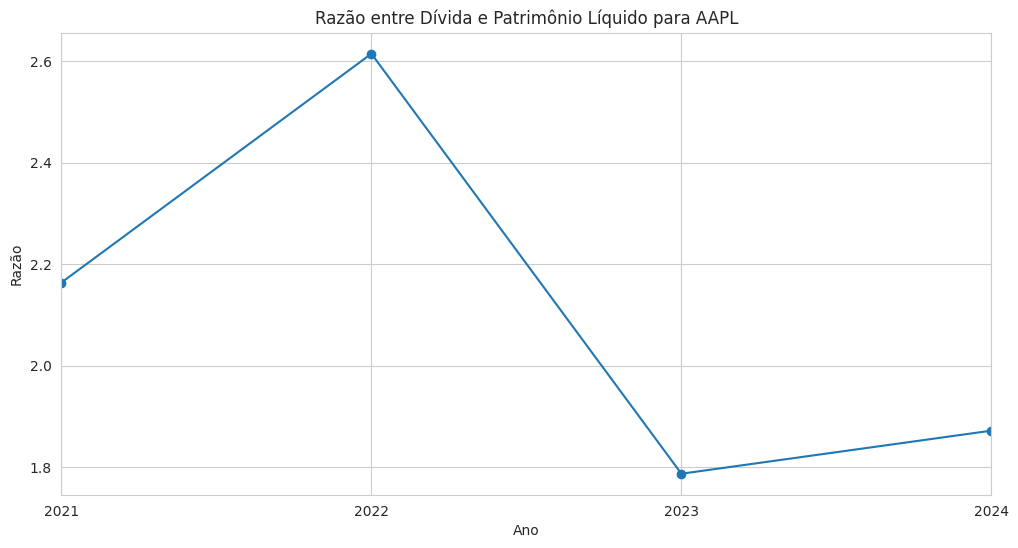

In [ ]:
df_bs['Debt to Equity Ratio'] = df_bs['Total Debt'] / df_bs['Stockholders Equity']
df_bs['Debt to Equity Ratio'].plot(figsize=(12, 6), marker = 'o')

plt.title(f'Razão entre Dívida e Patrimônio Líquido para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('Razão')
plt.grid(True)
plt.show()

3. Análise da Geração de Caixa(Fluxo de Caixa)

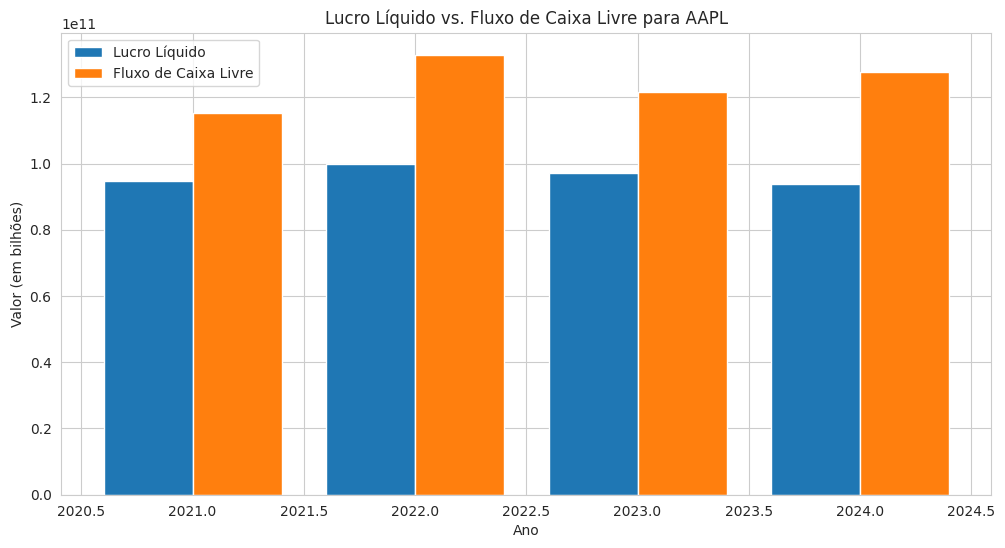

In [ ]:
df_cf = cash_flow.T
df_is = income_statement.T

# Calculando o Fluxo de Caixa Livre
df_cf['Free Cash Flow'] = df_cf['Operating Cash Flow'] - df_cf['Capital Expenditure']

plt.figure(figsize=(12, 6))
plt.bar(df_is.index.year - 0.2, df_is['Net Income'], width=0.4, label='Lucro Líquido')
plt.bar(df_cf.index.year + 0.2, df_cf['Free Cash Flow'], width=0.4, label='Fluxo de Caixa Livre')

plt.title(f'Lucro Líquido vs. Fluxo de Caixa Livre para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.legend()
plt.show()

## Análise de Múltiplos (Valuation)

In [ ]:
ticker.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [ ]:
def get_multiples(symbol):
  t = yf.Ticker(symbol)
  return{
      'P/L': t.info.get('trailingPE'),
      'P/VP': t.info.get('priceToBook'),
      'Dividend Yield': t.info.get('dividendYield', 0)*100
}
competitors = ['AAPL', 'MSFT']
multiples_df = pd.DataFrame({comp: get_multiples(comp) for comp in competitors})

print("\n--- Tabela Comparativa de Múltiplos ---")
print(multiples_df)


--- Tabela Comparativa de Múltiplos ---
                     AAPL       MSFT
P/L             39.821213  38.472446
P/VP            59.313923  11.332568
Dividend Yield  40.000000  70.000000


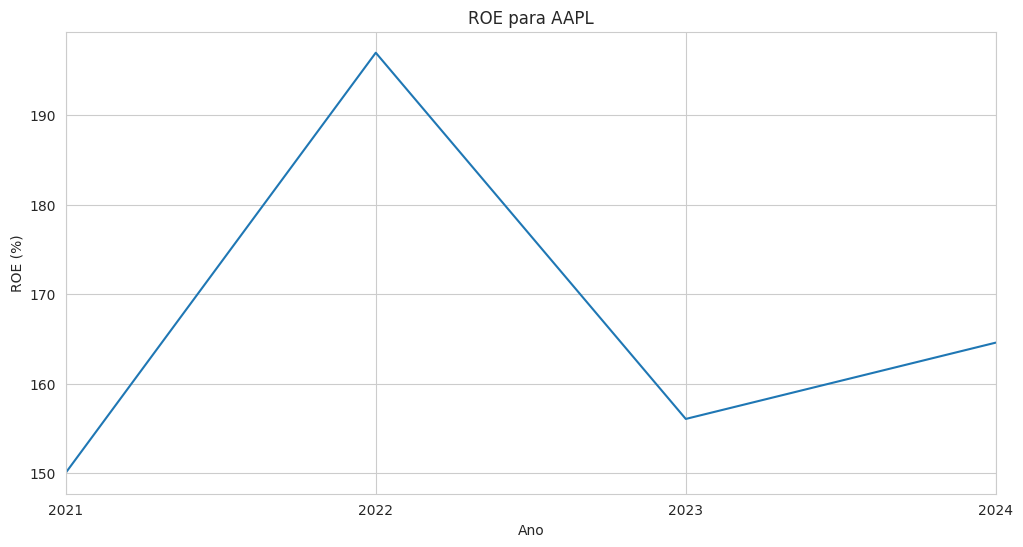

In [ ]:
## Calculando ROE
roe = (df_is['Net Income'] / df_bs['Stockholders Equity']) * 100
roe.plot(figsize=(12, 6))
plt.title(f'ROE para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('ROE (%)')
plt.show()


## Microsoft

In [ ]:
tickerMSFT_symbol2 = "MSFT"
tickerMSFT = yf.Ticker(tickerMSFT_symbol2)

## Demonstração dos Resultados
# Mostra receitas, custos e lucro ao longo do tempo
income_statement = tickerMSFT.financials

## Balanço Patrimonial
#Mostra os ativos, passivos e patrimônio Líquido da empresa

balance_sheet = tickerMSFT.balance_sheet

## Fluxo de Caixa
# Mostra como o dinheiro entra e sai da empresa

cash_flow = tickerMSFT.cashflow

general_info = tickerMSFT.info

print(f'---Demonstração dos Resultados---')
print(income_statement)
#print(f'---Balanço Patrimonial---')
#print(balance_sheet)
#print(f'---Fluxo de Caixa---')
#print(cash_flow)
#print(f'---Informações Gerais---')

---Demonstração dos Resultados---
                                                      2025-06-30  \
Tax Effect Of Unusual Items                        -7.708800e+07   
Tax Rate For Calcs                                  1.760000e-01   
Normalized EBITDA                                   1.606030e+11   
Total Unusual Items                                -4.380000e+08   
Total Unusual Items Excluding Goodwill             -4.380000e+08   
Net Income From Continuing Operation Net Minori...  1.018320e+11   
Reconciled Depreciation                             3.415300e+10   
Reconciled Cost Of Revenue                          8.783100e+10   
EBITDA                                              1.601650e+11   
EBIT                                                1.260120e+11   
Net Interest Income                                 2.620000e+08   
Interest Expense                                    2.385000e+09   
Interest Income                                     2.647000e+09   
Normalized Inc

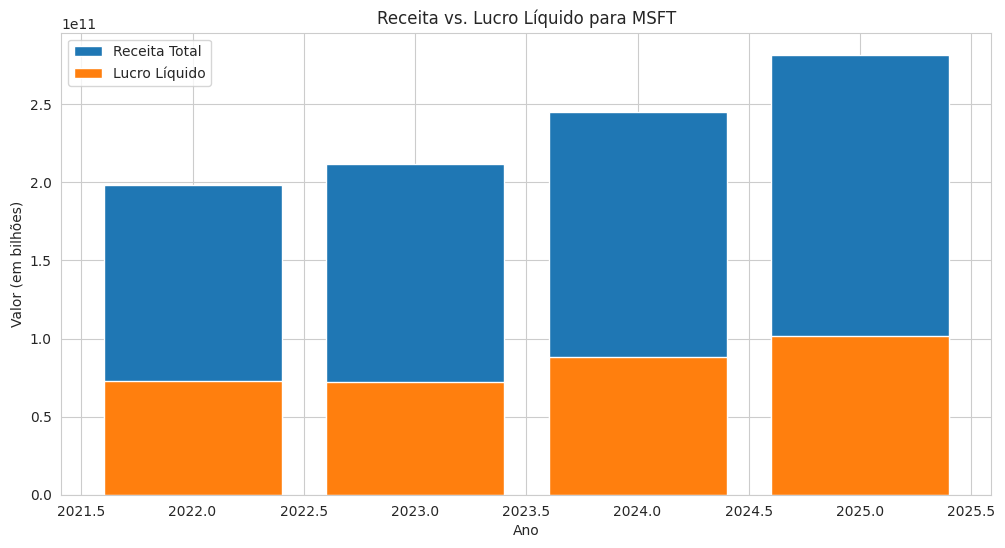

In [ ]:
# Transpondo os dados para facilitar o plot (anos nas colunas -> anos nas linhas)
df = income_statement.T

# Configurando o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico de Receita e Lucro Líquido
plt.bar(df.index.year, df['Total Revenue'], label='Receita Total')
plt.bar(df.index.year, df['Net Income'], label='Lucro Líquido')

plt.title(f'Receita vs. Lucro Líquido para {tickerMSFT_symbol2}')
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.legend()
plt.show()

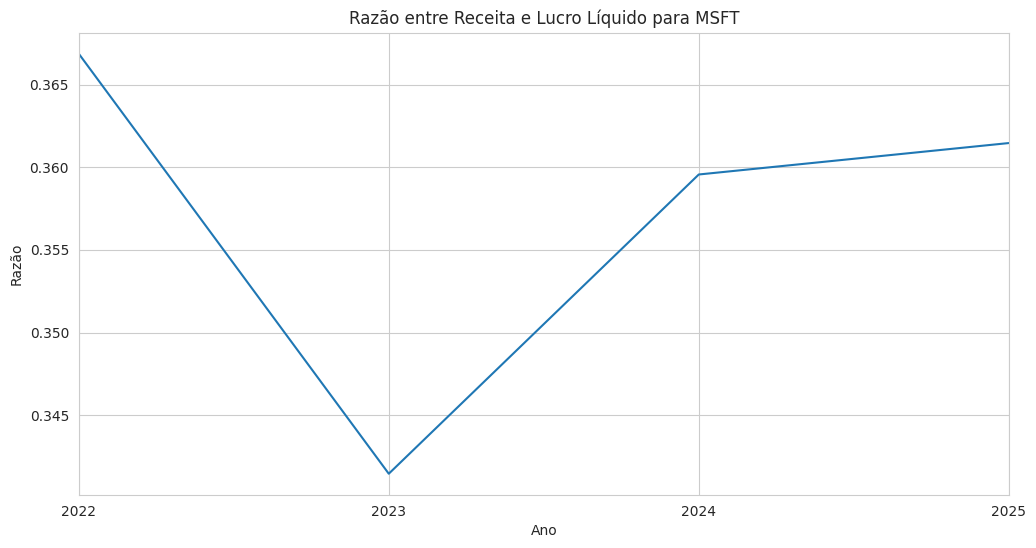

In [ ]:
## Razão entre receita e o lucro líquido
profit_to_revenue_ratio = df['Net Income'] / df['Total Revenue']
profit_to_revenue_ratio.plot(figsize=(12, 6))
plt.title(f'Razão entre Receita e Lucro Líquido para {tickerMSFT_symbol2}')
plt.xlabel('Ano')
plt.ylabel('Razão')
plt.show()

2. Balanço Patrimonial

In [43]:
df_bs = balance_sheet.T

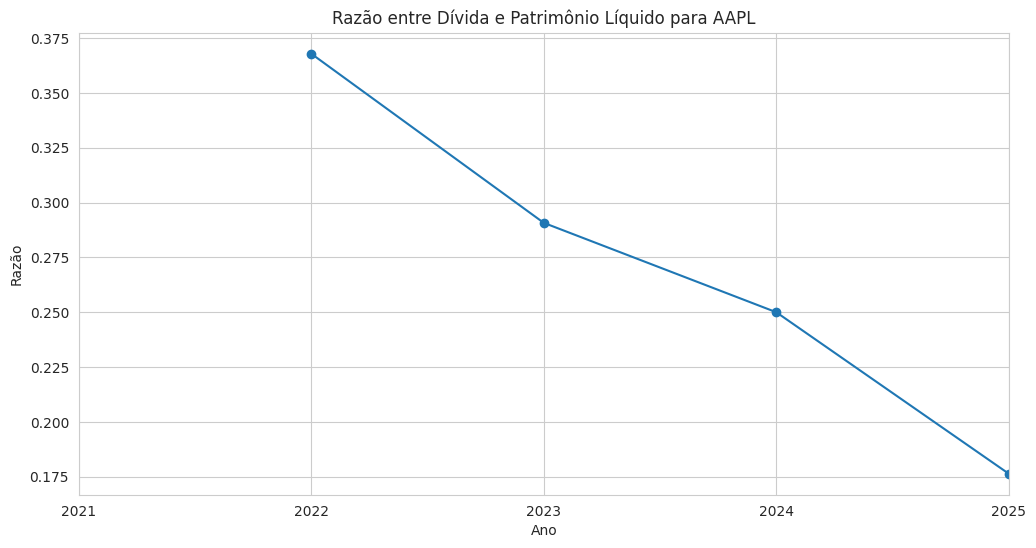

In [45]:
df_bs['Debt to Equity Ratio'] = df_bs['Total Debt'] / df_bs['Stockholders Equity']
df_bs['Debt to Equity Ratio'].plot(figsize=(12, 6), marker = 'o')

plt.title(f'Razão entre Dívida e Patrimônio Líquido para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('Razão')
plt.grid(True)
plt.show()

3. Análise da Geração de Caixa(Fluxo de Caixa)

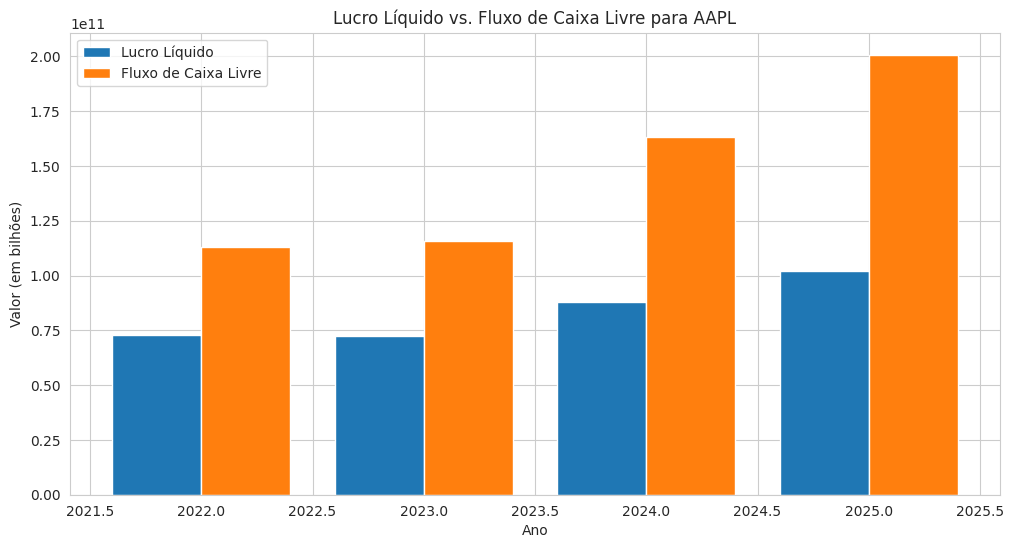

In [46]:
df_cf = cash_flow.T
df_is = income_statement.T

# Calculando o Fluxo de Caixa Livre
df_cf['Free Cash Flow'] = df_cf['Operating Cash Flow'] - df_cf['Capital Expenditure']

plt.figure(figsize=(12, 6))
plt.bar(df_is.index.year - 0.2, df_is['Net Income'], width=0.4, label='Lucro Líquido')
plt.bar(df_cf.index.year + 0.2, df_cf['Free Cash Flow'], width=0.4, label='Fluxo de Caixa Livre')

plt.title(f'Lucro Líquido vs. Fluxo de Caixa Livre para {ticker_symbol}')
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.legend()
plt.show()

## Análise de Múltiplos (Valuation)

In [48]:
ticker.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Microsoft Corporation develops and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Microsoft 365 Commercial, Enterprise Mobility + Security, Windows Commercial, Power BI, Exchange, SharePoint, Microsoft Teams, Security and Compliance, and Copilot; Microsoft 365 Commercial products, such as Windows Commercial on-premises and Office licensed services; Microsoft 365 Consumer products and cloud services, such as Microsoft 365 Consumer subscriptions, Office licensed on-premises, and other consu

In [49]:
def get_multiples(symbol):
  t = yf.Ticker(symbol)
  return{
      'P/L': t.info.get('trailingPE'),
      'P/VP': t.info.get('priceToBook'),
      'Dividend Yield': t.info.get('dividendYield', 0)*100
}
competitors = ['AAPL', 'MSFT']
multiples_df = pd.DataFrame({comp: get_multiples(comp) for comp in competitors})

print("\n--- Tabela Comparativa de Múltiplos ---")
print(multiples_df)


--- Tabela Comparativa de Múltiplos ---
                     AAPL       MSFT
P/L             39.821213  38.472446
P/VP            59.313923  11.332568
Dividend Yield  40.000000  70.000000


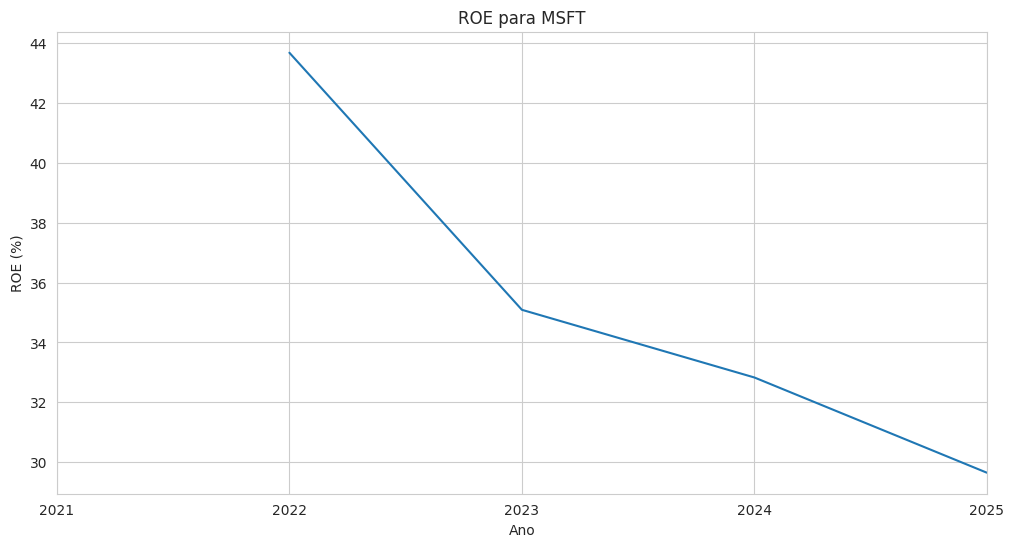

In [50]:
## Calculando ROE
roe = (df_is['Net Income'] / df_bs['Stockholders Equity']) * 100
roe.plot(figsize=(12, 6))
plt.title(f'ROE para {tickerMSFT_symbol2}')
plt.xlabel('Ano')
plt.ylabel('ROE (%)')
plt.show()
